In [1]:
import tensorflow as tf

In [5]:
fea_col = [ tf.feature_column.numeric_column(key='x',shape=[1]) ]

In [6]:
fea_col

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [7]:
estimator = tf.estimator.LinearRegressor(feature_columns=fea_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vprav\\AppData\\Local\\Temp\\tmpg0gjsfa1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E0BFDBBF60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
import numpy as np

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
x_data = np.linspace(0.0,10.0,1000000)

In [14]:
noise = np.random.randn(len(x_data))

In [15]:
noise

array([0.29273382, 0.12095148, 0.67875155, ..., 1.01207155, 0.36825313,
       0.35088742])

In [16]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

m=0.5
b=5

In [17]:
y_true = (0.5*x_data) + 5 + noise

In [19]:
x_df = pd.DataFrame(data=x_data,columns=['X_dt'])

In [20]:
y_df = pd.DataFrame(data=y_true,columns=['y'])

In [21]:
x_df.head()

,X_dt
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [22]:
y_df.head()

,y
0,5.292734
1,5.120956
2,5.678762
3,5.109927
4,3.387844


In [23]:
data1 = pd.concat([x_df,y_df],axis=1)

In [24]:
data1.head()

,X_dt,y
0,0.00000,5.292734
1,0.00001,5.120956
2,0.00002,5.678762
3,0.00003,5.109927
4,0.00004,3.387844


In [26]:
data1.shape

(1000000, 2)

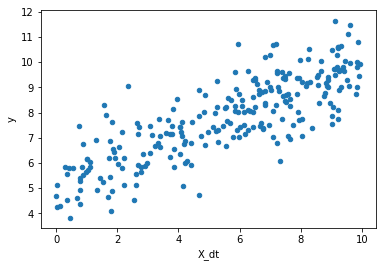

In [30]:
data1.sample(n=250).plot(kind='scatter',x='X_dt',y='y')

In [31]:
batch_size = 10

In [32]:
np.random.randn(2)

array([0.04425638, 1.06219736])

In [33]:
m = tf.Variable(0.04)
b = tf.Variable(1.06)

In [38]:
xph = tf.placeholder(tf.float32,[batch_size],name="X_placeholder")

In [39]:
yph = tf.placeholder(tf.float32,[batch_size],name="Y_placeholder")

In [40]:
y_model = m*xph + b

In [41]:
error = tf.reduce_sum(tf.square(y_model - yph))

In [42]:
opti = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [43]:
train = opti.minimize(error)

In [44]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        ran_int = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[ran_int],yph:y_true[ran_int]}
        
        sess.run(train, feed_dict=feed)
        
    mod_m, mod_b = sess.run([m,b])

In [47]:
mod_m

0.4578777

In [48]:
mod_b

4.938608

In [49]:
y_hat = x_data*mod_m + mod_b

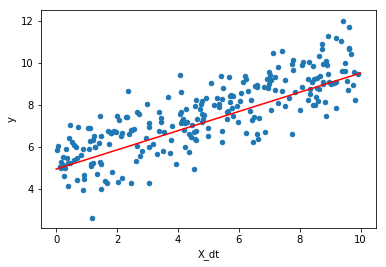

In [50]:
data1.sample(n=250).plot(kind='scatter',x='X_dt',y='y')
plt.plot(x_data, y_hat, 'r')

In [51]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        ran_int = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[ran_int],yph:y_true[ran_int]}
        
        sess.run(train, feed_dict=feed)
        
    mod_m, mod_b = sess.run([m,b])

In [52]:
mod_m

0.5161739

In [53]:
mod_b

4.9878697

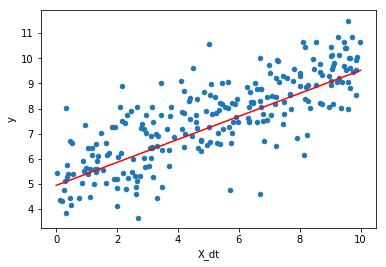

In [54]:
data1.sample(n=250).plot(kind='scatter',x='X_dt',y='y')
plt.plot(x_data, y_hat, 'r')